<a href="https://colab.research.google.com/github/rohanroney/email-campaign-effectiveness-prediction/blob/main/Rohan_Roney_Capstone_Project_Email_Campaign_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement:
Most of the small to medium business owners are making effective use of Gmail-based Email marketing Strategies for offline targeting of converting their prospective customers into leads so that they stay with them in Business. 
The main objective is to create a machine learning model to characterize the mail and track the mail that is ignored; read; acknowledged by the reader. 


## EDA - Understanding the Data

In [63]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler



In [64]:
# Loading the dataset
df = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Cohort Nilgiri/Module 3/Capstone Project - Email Campaign Effectiveness Prediction/data_email_campaign.csv")

In [65]:
df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [66]:
df.shape

(68353, 12)

* Hence there are 12 features.
* The target variable here is "Email_Status"


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


We can observe that there are a lot of null values for features like Customer_Location (11,595), Total_Past_Communications (6825), Total_Links(2201) and Total_Images(1677).

In [68]:
df.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


In [69]:
# Checking for duplicates in the data
len(df[df.duplicated()])


0

Hence we can understand that there is no duplication in data. 

### Understanding the relationship of the dependent variable with all features by correlation matrix and chi-2 test i.e feature importance.

####First converting the Customer_location into categorical data

In [70]:
df['Customer_Location']=df['Customer_Location'].astype('category').cat.codes

## Checking for correlation between the target variable and feature variables using <b>correlation matrix</b> analysis 

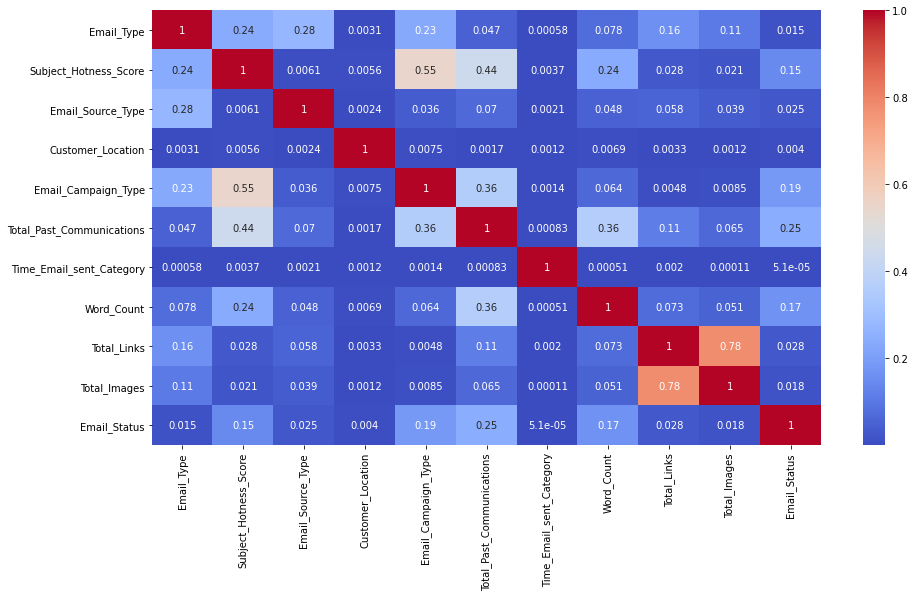

In [71]:
## Entire data co-relation
plt.figure(figsize=(15,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

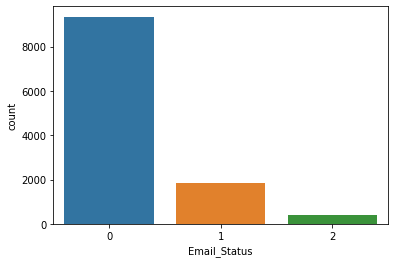

In [ ]:
# Checking the data which has missing values of location
check = df[df["Customer_Location"].isnull()]
sns.countplot(x='Email_Status',data=check)


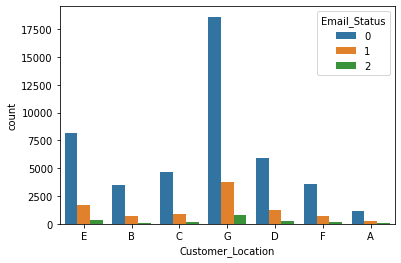

In [ ]:
## Histogram of the data
sns.countplot(x="Customer_Location", hue="Email_Status", data=df)

If you look at the above 2 visualizations, we can say that ratio of the overall data is same as the data with missing info value of Customer location. Also irrespective of the location the ratio of the statuses is similar in nature. 

From the correlation matrix we observe that Email_Status and Lcation are not highly co-related at all.

Also thinking from an intuitive prespective for Email campaigning Location does not seem an important feature. Hence <b>deciding to drop Customer Location</b>.

In [74]:
## Dropping the locations column
df.drop(['Customer_Location'], axis='columns', inplace=True)

Also, since the <b>ID field is of not much use, we will drop that as well</b>.

In [75]:
df.drop(['Email_ID'], axis='columns', inplace=True)

###Understanding the Numerical Variables

In [76]:
# Storing all the numeric features
numerical_variables = ["Subject_Hotness_Score","Total_Past_Communications","Word_Count","Total_Links","Total_Images"]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f61dcda9050>,
      dtype=object)

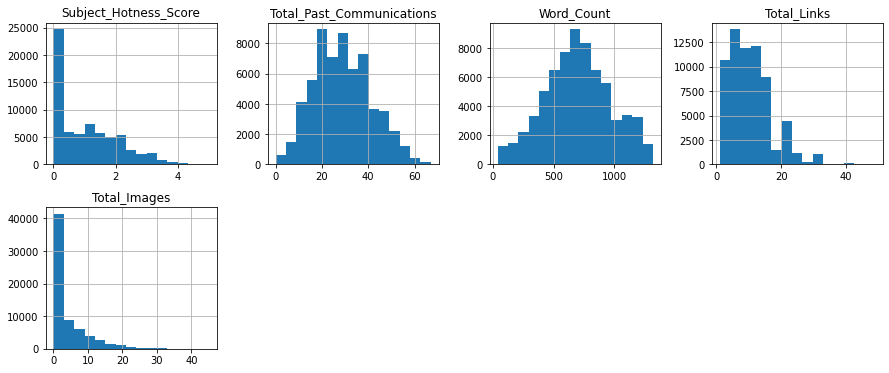

In [77]:
df[numerical_variables].hist(bins=15, figsize=(15, 6), layout=(2, 4))


* Total Images - Value ranges from 0-45. It is mostly right skewed and most of the emails have 0-2 images and very few have 10+ images.
* Total Links - Value ranges from 1-49. Above 16 links are very few.
* Both word_count and total_past_communication follow somewhat of a normal distribution.
* Subject Hotness Score is rightly skewed. Most of it has values at or around the 0-0.3 mark.


Lets fill all the missing values from the 3 numeric columns.
Total_Links and Total_Images both are highly skewed to the right hence taking mode for bothof them.
Total_Past Communication is kind of normally distributed and hence taking mean for that.

In [78]:
# Replacing all of the missing values
df['Total_Links'].fillna(int(df['Total_Links'].mode()), inplace=True)
df['Total_Images'].fillna(int(df['Total_Images'].mode()), inplace=True)
df['Total_Past_Communications'].fillna(int(df['Total_Past_Communications'].mean()), inplace=True)
# df['Total_Links'].interpolate(method='polynomial',inplace=True)
# df['Total_Images'].interpolate(method='polynomial',inplace=True)
# df['Total_Past_Communications'].interpolate(method='polynomial',inplace=True)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_Type                 68353 non-null  int64  
 1   Subject_Hotness_Score      68353 non-null  float64
 2   Email_Source_Type          68353 non-null  int64  
 3   Email_Campaign_Type        68353 non-null  int64  
 4   Total_Past_Communications  68353 non-null  float64
 5   Time_Email_sent_Category   68353 non-null  int64  
 6   Word_Count                 68353 non-null  int64  
 7   Total_Links                68353 non-null  float64
 8   Total_Images               68353 non-null  float64
 9   Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 5.2 MB


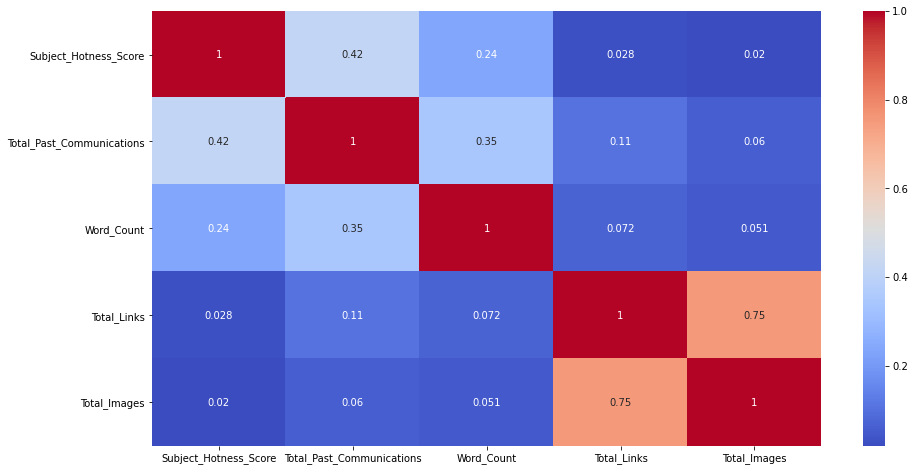

In [80]:
df_numeric = df[numerical_variables]
plt.figure(figsize=(15,8))
correlation = df_numeric.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

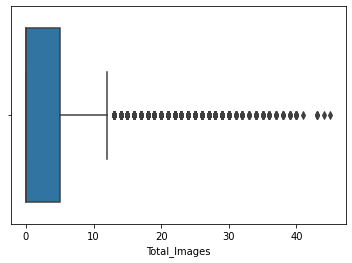

In [81]:
sns.boxplot(x=df["Total_Images"])

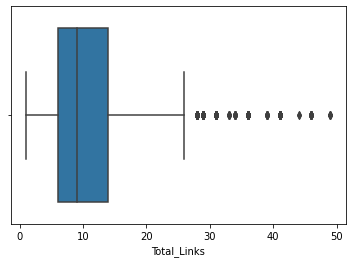

In [82]:
sns.boxplot(x=df["Total_Links"])

Here we can observe very high multicollinearity between 2 features i.e. total_images as well as total_links. 

Also we see that Total_Images have a lot of outlier values.

Hence <b>combining the Total_Images feature and the Total_Links</b>

In [83]:
## Dropping Total_Images
df['Total Attributes'] = df['Total_Images'] + df['Total_Links']
df.drop(['Total_Images'], axis='columns', inplace=True)
df.drop(['Total_Links'], axis='columns', inplace=True)


In [84]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [85]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Email_ID','Email_Type','Email_Source_Type','Email_Campaign_Type','Time_Email_sent_Category']]])

,variables,VIF
0,Subject_Hotness_Score,1.736461
1,Total_Past_Communications,3.890866
2,Word_Count,3.695653
3,Email_Status,1.296849
4,Total Attributes,2.630441


Hence we can observe that multicollinearity is within limits as well.

Lets now observe the presence of any outliers:

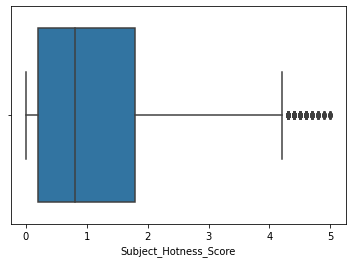

In [18]:
sns.boxplot(x=df["Subject_Hotness_Score"])

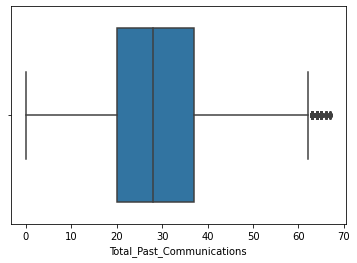

In [19]:
sns.boxplot(x=df["Total_Past_Communications"])

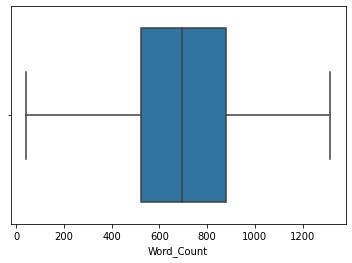

In [20]:
sns.boxplot(x=df["Word_Count"])

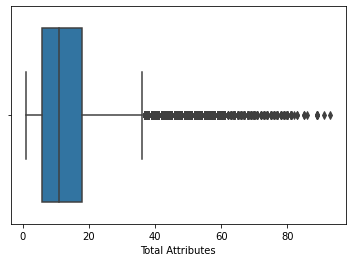

In [21]:
sns.boxplot(x=df["Total Attributes"])

Lets remove these outliers using the Z-score parameter.

In [86]:
# Removal of outliers
z_scores = stats.zscore(df[["Subject_Hotness_Score","Total_Past_Communications","Word_Count","Total Attributes"]])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 2.85).all(axis=1)
new_df = df[filtered_entries]

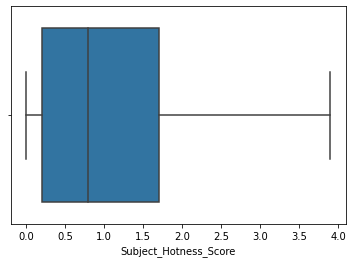

In [87]:
sns.boxplot(x=new_df["Subject_Hotness_Score"])

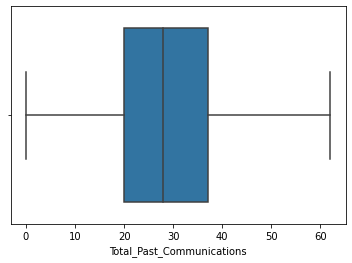

In [88]:
sns.boxplot(x=new_df["Total_Past_Communications"])

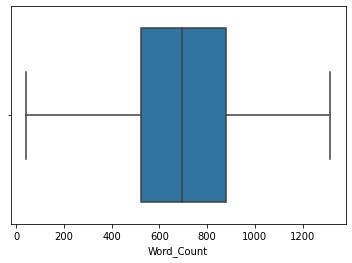

In [89]:
sns.boxplot(x=new_df["Word_Count"])

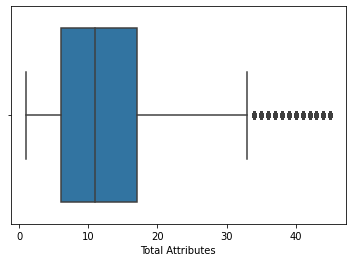

In [90]:
sns.boxplot(x=new_df["Total Attributes"])

The new df after most of the outlier treatment consists of close to 66K records.

In [91]:
new_df.shape

(66024, 9)

In [92]:
new_df.head()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Email_Status,Total Attributes
0,1,2.2,2,2,33.0,1,440,0,8.0
1,2,2.1,1,2,15.0,2,504,0,5.0
2,2,0.1,1,3,36.0,2,962,1,5.0
3,1,3.0,2,2,25.0,2,610,0,16.0
4,1,0.0,2,3,18.0,2,947,0,4.0


### Understanding the Categorical Variables


In [93]:
categorical_features = ["Email_Type","Email_Source_Type","Email_Campaign_Type","Time_Email_sent_Category"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

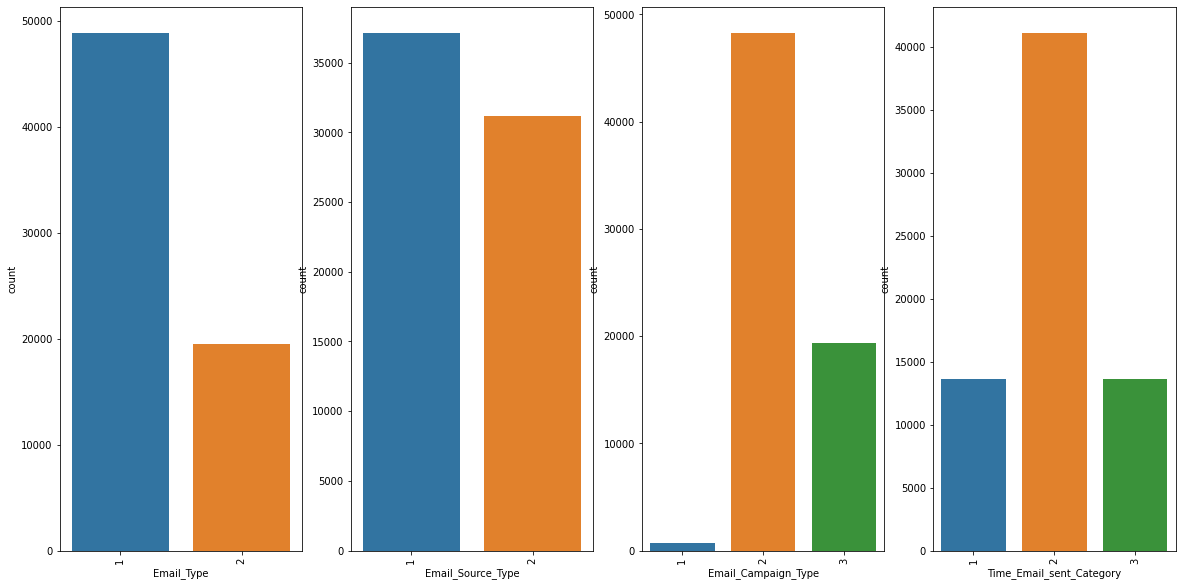

In [94]:
fig, ax = plt.subplots(1, 4, figsize=(20, 10))
for variable, subplot in zip(categorical_features, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

* We can see one of the Email type 1 is significantly more than Email Type 2.
* We observe that both the sources send out emails equally.
* Considering Time_Email_sent category 2 has extreme high numbers whereas 1 and 2 have comparable number.
* Finally considering Email_Campaign_Type, 2 outperforms the the other campign types in terms of quantity, while 1 sends out the least no.of mails.

Using the One-hot encoding method to handle the categorical data.

In [95]:
new_df = pd.get_dummies(new_df, columns= categorical_features, prefix=["Email_Type", "Source","Campaign","Time_Sent"])

In [96]:
new_df

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Email_Status,Total Attributes,Email_Type_1,Email_Type_2,Source_1,Source_2,Campaign_1,Campaign_2,Campaign_3,Time_Sent_1,Time_Sent_2,Time_Sent_3
0,2.2,33.0,440,0,8.0,1,0,0,1,0,1,0,1,0,0
1,2.1,15.0,504,0,5.0,0,1,1,0,0,1,0,0,1,0
2,0.1,36.0,962,1,5.0,0,1,1,0,0,0,1,0,1,0
3,3.0,25.0,610,0,16.0,1,0,0,1,0,1,0,0,1,0
4,0.0,18.0,947,0,4.0,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68347,0.0,32.0,1173,2,9.0,1,0,0,1,0,0,1,0,0,1
68348,0.4,22.0,737,0,29.0,0,1,1,0,0,1,0,0,0,1
68350,2.2,33.0,490,0,9.0,1,0,0,1,0,1,0,0,1,0
68351,0.4,50.0,733,0,18.0,1,0,1,0,0,1,0,1,0,0


We understand that since Email_Type and Source are both binary variables, we can eliminate one of each of the two features for feature reduction process.

Hence removing Email_Type_2 and Source_2.

In [97]:
new_df.drop(['Email_Type_2'], axis='columns', inplace=True)
new_df.drop(['Source_2'], axis='columns', inplace=True)

Also from our understanding of the features importance metrics, we understand that the time also does not have much importance to our data.

In [98]:
new_df.drop(['Time_Sent_1'], axis='columns', inplace=True)
new_df.drop(['Time_Sent_2'], axis='columns', inplace=True)
new_df.drop(['Time_Sent_3'], axis='columns', inplace=True)

In [99]:
new_df.head()

,Subject_Hotness_Score,Total_Past_Communications,Word_Count,Email_Status,Total Attributes,Email_Type_1,Source_1,Campaign_1,Campaign_2,Campaign_3
0,2.2,33.0,440,0,8.0,1,0,0,1,0
1,2.1,15.0,504,0,5.0,0,1,0,1,0
2,0.1,36.0,962,1,5.0,0,1,0,0,1
3,3.0,25.0,610,0,16.0,1,0,0,1,0
4,0.0,18.0,947,0,4.0,1,0,0,0,1


### Dependent Variable - Email_Status

In [100]:
# Looking at all the unique data
df["Email_Status"].unique()

array([0, 1, 2])

Hence there are a total of 3 labels our data can be classified as which can be translated to ignored, read, acknowledged.

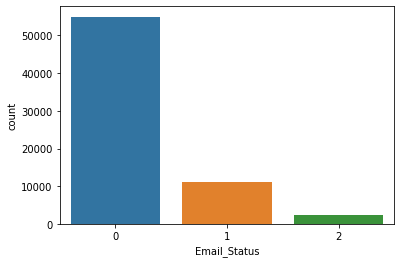

In [101]:
# Pllotting the freq of the target variables
sns.countplot(x='Email_Status',data=df)

Clearly from the plot we observe that our data is very imbalanced in nature having majority of the records from class 0 and very less records for class 1 and 2.

Handling the Imbalance of Data - SMOTE Technique

In [102]:
# Splitting the data into X and Y where X are the independent variables and Y are the target variables

X = new_df.loc[ : , new_df.columns != 'Email_Status']
Y = new_df.Email_Status


In [ ]:
pip install imblearn

In [103]:
# Creating instance of SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [104]:
# Oversampling the train set 
X_smote , y_smote = smote.fit_sample(X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [105]:
from collections import Counter
print("Before SMOTE: " , Counter(Y))
print("After SMOTE: " , Counter(y_smote))


Before SMOTE:  Counter({0: 53054, 1: 10662, 2: 2308})
After SMOTE:  Counter({0: 53054, 1: 53054, 2: 53054})


Text(0.5, 1.0, 'Before SMOTE')

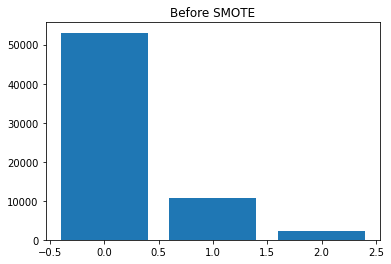

In [106]:
plt.bar(Counter(Y).keys(), Counter(Y).values())
plt.title("Before SMOTE")

Text(0.5, 1.0, 'After SMOTE')

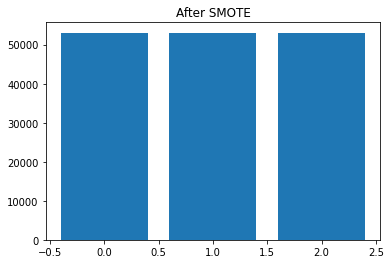

In [107]:
plt.bar(Counter(y_smote).keys(), Counter(y_smote).values())
plt.title("After SMOTE")

The imbalanced data has been balanced now with classes 1 and 2 being oversampled to 53054

In [108]:
# Doing a train test split 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test, y_train,y_test = train_test_split(X_smote,y_smote,test_size = 0.3,random_state = 10, stratify = y_smote)

# # Standardization 
scaler = StandardScaler()
normalized_X_train = pd.DataFrame(scaler.fit_transform(X_train))
normalized_X_test = pd.DataFrame(scaler.transform(X_test))


Text(0.5, 1.0, 'Predictors in train split')

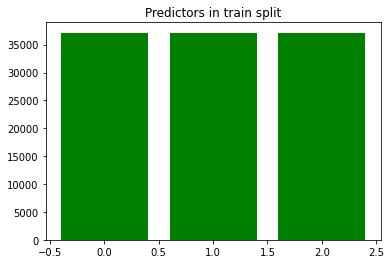

In [113]:
# Distribution of y on train set
plt.bar(Counter(y_train).keys(), Counter(y_train).values(),color='g')
plt.title("Predictors in train split")


Text(0.5, 1.0, 'Predictors in test split')

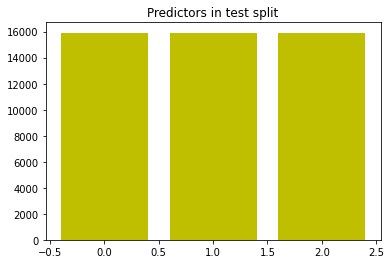

In [114]:
# Distribution of y on test set
plt.bar(Counter(y_test).keys(), Counter(y_test).values(),color='y')
plt.title("Predictors in test split")

Hence did an equal split of train test in the same ratio for the dependent variables.

## XG-Boost :

In [116]:
# XG Boost Object
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=100,max_depth=12,min_samples_leaf=20,min_samples_split=30)

In [117]:
# Training the model
xgb.fit(normalized_X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=1, min_samples_leaf=20, min_samples_split=30,
              missing=None, n_estimators=100, n_jobs=1, nthread=None,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

## Predicting the y labels and probabilities for both y test as well as train

In [118]:
# Predicting the probabilities for y-test
y_predict_proba = xgb.predict_proba(normalized_X_test)

# Predicting the probabilities for y-train
y_predict_train_proba = xgb.predict_proba(normalized_X_train)

In [119]:
# Predicting the label for y-test
y_predict = xgb.predict(normalized_X_test)

# Predicting the label for y-train
y_predict_train = xgb.predict(normalized_X_train)

In [122]:
from sklearn.metrics import classification_report,roc_auc_score,f1_score,roc_curve,plot_confusion_matrix
print("Classification report for train data\n\n",classification_report(y_train,y_predict_train))

Classification report for train data

               precision    recall  f1-score   support

           0       0.89      0.98      0.93     37138
           1       0.96      0.80      0.87     37137
           2       0.91      0.96      0.93     37138

    accuracy                           0.91    111413
   macro avg       0.92      0.91      0.91    111413
weighted avg       0.92      0.91      0.91    111413



Classification report for test data

               precision    recall  f1-score   support

           0       0.83      0.95      0.89     15916
           1       0.85      0.66      0.74     15917
           2       0.83      0.90      0.86     15916

    accuracy                           0.84     47749
   macro avg       0.84      0.84      0.83     47749
weighted avg       0.84      0.84      0.83     47749

ROC-AUC for trainset:  0.9863198800239971
ROC-AUC for testset:  0.9449650920968026


F1 Score for trainset:  0.9129998299496329
F1 Score for testset:  0.830988885593308


 col_0      0      1      2
row_0                     
0      15092    757     67
1       2455  10507   2955
2        537   1060  14319 



Text(0.5, 69.0, '')

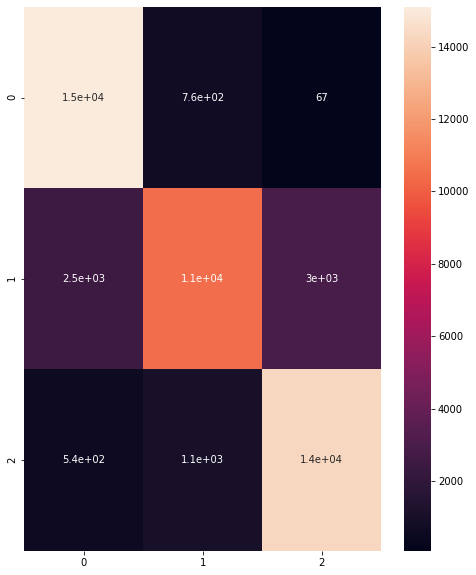

In [147]:
print("Classification report for test data\n\n",classification_report(y_test,y_predict))

# ROC-AUC Score
print("ROC-AUC for trainset: ", roc_auc_score(y_train,y_predict_train_proba,multi_class = 'ovr'))
print("ROC-AUC for testset: ", roc_auc_score(y_test,y_predict_proba,multi_class = 'ovr'))
print("\n")

# F1 Score
print("F1 Score for trainset: ", f1_score(y_train,y_predict_train,average='weighted'))
print("F1 Score for testset: ", f1_score(y_test,y_predict,average='weighted'))

# Plot the confusion matrix
hmp = pd.crosstab(y_test,y_predict)
print("\n\n",hmp,"\n")
fig, ax = plt.subplots(figsize = (8,10))
sns.heatmap(hmp, annot=True)
ax.set_ylabel('')    
ax.set_xlabel('')

### Hence XG Boost gives very good results for train and test data both. Checking the ROC-AUC curve.

In [148]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [150]:
auc = roc_auc_score(y_test,y_predict_proba,multi_class = 'ovr')
print('AUC: %.2f' % auc)

AUC: 0.94


In [141]:
features = X.columns
importances = xgb.feature_importances_
indices = np.argsort(importances)

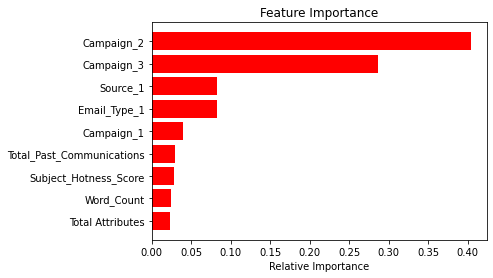

In [142]:
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## Using Naive Bayes:

In [143]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(normalized_X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [144]:
# Predicting the probability values
y_predict_proba_naive = classifier.predict_proba(normalized_X_test)
y_predict_train_proba_naive = classifier.predict_proba(normalized_X_train)
y_predict_naive = classifier.predict(normalized_X_test)
y_predict_train_naive = classifier.predict(normalized_X_train)

In [145]:
print(classification_report(y_train,y_predict_train_naive))

              precision    recall  f1-score   support

           0       0.50      0.78      0.61     37138
           1       0.37      0.01      0.03     37137
           2       0.49      0.69      0.57     37138

    accuracy                           0.49    111413
   macro avg       0.45      0.49      0.40    111413
weighted avg       0.45      0.49      0.40    111413



In [146]:
# Predicting the metrics
from sklearn.metrics import classification_report,roc_auc_score,f1_score
print(classification_report(y_test,y_predict_naive))
print("ROC-AUC for trainset: ", roc_auc_score(y_train,y_predict_train_proba_naive,multi_class = 'ovr'))
print("ROC-AUC for testset: ", roc_auc_score(y_test,y_predict_proba_naive,multi_class = 'ovr'))
print("\n")
print("F1 Score for trainset: ", f1_score(y_train,y_predict_train_naive,average='weighted'))
print("F1 Score for testset: ", f1_score(y_test,y_predict_naive,average='weighted'))
pd.crosstab(y_test,y_predict_naive)

              precision    recall  f1-score   support

           0       0.50      0.78      0.61     15916
           1       0.38      0.02      0.03     15917
           2       0.49      0.69      0.58     15916

    accuracy                           0.49     47749
   macro avg       0.46      0.49      0.40     47749
weighted avg       0.46      0.49      0.40     47749

ROC-AUC for trainset:  0.6975276888845695
ROC-AUC for testset:  0.6982927947505218


F1 Score for trainset:  0.40281839783636414
F1 Score for testset:  0.404948078686676


col_0,0,1,2
row_0,,,
0,12401,62,3453
1,7825,256,7836
2,4585,353,10978


We can see that the Naive Bayes Model does not work well for the dataset as it does not beat even the baseline score.

## Conclusion:

* We understand that XG Boost works best for the model.
* From feature analysis, we can observe that the Email_Campaign_Type is highly important and highly affects the Email to be read/acknowledged.
* Email_Time is not a very important metric 